In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/ag_news_train.csv')

In [3]:
data.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
data.shape

(120000, 3)

In [5]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119995    False
119996    False
119997    False
119998    False
119999    False
Length: 120000, dtype: bool

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull()

,label,title,description
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
119995,False,False,False
119996,False,False,False
119997,False,False,False
119998,False,False,False


In [8]:
data.isnull().sum()

label          0
title          0
description    0
dtype: int64

In [9]:
import re
import string

In [10]:
data["title"].head(5)

0    Wall St. Bears Claw Back Into the Black (Reuters)
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2      Oil and Economy Cloud Stocks' Outlook (Reuters)
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
Name: title, dtype: object

In [11]:
# convert uppercase to lowercase

data["title"] = data["title"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["title"].head(5)

0    wall st. bears claw back into the black (reuters)
1    carlyle looks toward commercial aerospace (reu...
2      oil and economy cloud stocks' outlook (reuters)
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to all-time record, posing new...
Name: title, dtype: object

In [13]:
data["description"].head(5)

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: description, dtype: object

In [14]:
data["description"] = data["description"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["description"].head(5)

0    reuters - short-sellers, wall street's dwindli...
1    reuters - private investment firm carlyle grou...
2    reuters - soaring crude prices plus worries\ab...
3    reuters - authorities have halted oil export\f...
4    afp - tearaway world oil prices, toppling reco...
Name: description, dtype: object

In [16]:
#remove unwanted links in the text data

data["title"] = data["title"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

data["description"] = data["description"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

In [17]:
#remove punctuations in the text data

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["title"] = data["title"].apply(remove_punctuations)

In [18]:
data["title"].head(10)

0       wall st bears claw back into the black reuters
1    carlyle looks toward commercial aerospace reuters
2         oil and economy cloud stocks outlook reuters
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to alltime record posing new m...
5             stocks end up but near year lows reuters
6                   money funds fell in latest week ap
7    fed minutes show dissent over inflation usatod...
8                                 safety net forbescom
9               wall st bears claw back into the black
Name: title, dtype: object

In [19]:
#remove numbers in the data set

data["title"] = data["title"].str.replace('\d+', '', regex=True)

In [20]:
data["title"].tail(10)

119990              barack obama gets  million book deal ap
119991              rauffer beats favorites to win downhill
119992          iraqis face winter shivering by candlelight
119993    au says sudan begins troop withdrawal from darfur
119994      syria redeploys some security forces in lebanon
119995     pakistans musharraf says wont quit as army chief
119996                     renteria signing a topshelf deal
119997                      saban not going to dolphins yet
119998                                     todays nfl games
119999                         nets get carter from raptors
Name: title, dtype: object

In [21]:
#remove stopwords from the data set 

!pip install nltk

import nltk

In [22]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
with open ('../static/model/corpora/stopwords/english', 'r')as file:
    sw = file.read().splitlines()

In [24]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [25]:
data["title"] = data["title"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [26]:
data["title"].head(10)

0                wall st bears claw back black reuters
1    carlyle looks toward commercial aerospace reuters
2             oil economy cloud stocks outlook reuters
3    iraq halts oil exports main southern pipeline ...
4    oil prices soar alltime record posing new mena...
5                    stocks end near year lows reuters
6                      money funds fell latest week ap
7       fed minutes show dissent inflation usatodaycom
8                                 safety net forbescom
9                        wall st bears claw back black
Name: title, dtype: object

In [27]:
#stemming - turning words like "going" to "go" 

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [28]:
data["title"] = data["title"].apply(lambda x: " ".join(ps.stem(x)for x in x.split()))

In [29]:
data["title"].head(10)

0                  wall st bear claw back black reuter
1          carlyl look toward commerci aerospac reuter
2               oil economi cloud stock outlook reuter
3    iraq halt oil export main southern pipelin reuter
4    oil price soar alltim record pose new menac us...
5                       stock end near year low reuter
6                       money fund fell latest week ap
7            fed minut show dissent inflat usatodaycom
8                                 safeti net forbescom
9                         wall st bear claw back black
Name: title, dtype: object

In [30]:
#building a vacabulary

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab

Counter()

In [33]:
data

,label,title,description
0,3,wall st bear claw back black reuter,"reuters - short-sellers, wall street's dwindli..."
1,3,carlyl look toward commerci aerospac reuter,reuters - private investment firm carlyle grou...
2,3,oil economi cloud stock outlook reuter,reuters - soaring crude prices plus worries\ab...
3,3,iraq halt oil export main southern pipelin reuter,reuters - authorities have halted oil export\f...
4,3,oil price soar alltim record pose new menac us...,"afp - tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,pakistan musharraf say wont quit armi chief,karachi (reuters) - pakistani president pervez...
119996,2,renteria sign topshelf deal,red sox general manager theo epstein acknowled...
119997,2,saban go dolphin yet,the miami dolphins will put their courtship of...
119998,2,today nfl game,pittsburgh at ny giants time: 1:30 p.m. line: ...


In [34]:
for sentence in data["title"]:
    vocab.update(sentence.split())

In [35]:
vocab

Counter({'ap': 7778,
         'us': 5886,
         'reuter': 4262,
         'new': 4008,
         'say': 2867,
         'win': 2721,
         'ltbgtltbgt': 2559,
         'oil': 2497,
         'microsoft': 2322,
         'iraq': 2285,
         'kill': 2195,
         'updat': 2175,
         'afp': 1966,
         'stock': 1904,
         'price': 1821,
         'deal': 1801,
         'profit': 1746,
         'report': 1739,
         'get': 1737,
         'game': 1684,
         'plan': 1655,
         'take': 1583,
         'china': 1573,
         'back': 1533,
         'rise': 1497,
         'sale': 1483,
         'talk': 1471,
         'cut': 1463,
         'open': 1458,
         'may': 1432,
         'hit': 1371,
         'set': 1324,
         'world': 1297,
         'lead': 1294,
         'bush': 1261,
         'secur': 1242,
         'buy': 1241,
         'make': 1181,
         'ibm': 1176,
         'end': 1160,
         'top': 1152,
         'fall': 1150,
         'first': 1131,
     

In [36]:
len(vocab)

26544

In [37]:
data.shape

(120000, 3)

In [38]:
tokens = [key for key in vocab if vocab[key]>10]

In [39]:
len(tokens)

6016

In [40]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [41]:
#deviding data set to train and test

In [42]:
x = data['title']
y = data['label']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.16666)

In [44]:
x_train.shape

(100000,)

In [45]:
x_test.shape

(20000,)

In [46]:
y_train

25385     2
775       1
17394     3
26597     2
16254     3
         ..
54393     3
48669     2
14135     1
11586     4
118666    2
Name: label, Length: 100000, dtype: int64

In [47]:
y_test

65444     2
6194      2
115956    3
37993     4
119146    2
         ..
94255     4
42643     1
27118     1
74028     4
13455     1
Name: label, Length: 20000, dtype: int64

In [48]:
x_train

25385     brown beat raven behind garcia nfl week updat
775                      liechtenstein royal swap power
17394                 dollar paus market await job data
26597                           bush expect nascar race
16254                             consum confid plummet
                              ...                      
54393                  standard charter win bid permata
48669                                  giant shake favr
14135            power typhoon chaba hit southern japan
11586           nasa make recoveri follow shuttl disast
118666                             reveal ref get wrong
Name: title, Length: 100000, dtype: object

In [49]:
x_test

65444     fantasi spin mccardel among three wr move
6194                     william stun belaru runner
115956                  european stabil pact surviv
37993        newli discov dinosaur reach chomp prey
119146                iaaf receiv explan kenteri ap
                            ...                    
94255      scramjet break speed record final flight
42643         tini crawford newspap endors kerri ap
27118            jordanian truck driver abduct iraq
74028            watch grand theft auto back street
13455         taiwan rescuer dig bodi buri landslid
Name: title, Length: 20000, dtype: object

In [50]:
#vectorization - changing words in to numbers(1,0)

In [55]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [56]:
vectorized_x_train = vectorizer(x_train, tokens)

In [57]:
for i in vectorized_x_train[0]:
    print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


In [58]:
vectorized_x_test = vectorizer(x_test, tokens)

In [59]:
for i in vectorized_x_test[0]:
    print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [60]:
#training data

In [61]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_train

25385     2
775       1
17394     3
26597     2
16254     3
         ..
54393     3
48669     2
14135     1
11586     4
118666    2
Name: label, Length: 100000, dtype: int64

In [63]:
#testing data

In [64]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_test

65444     2
6194      2
115956    3
37993     4
119146    2
         ..
94255     4
42643     1
27118     1
74028     4
13455     1
Name: label, Length: 20000, dtype: int64

In [66]:
#checking if the dataset ballenced or not

In [67]:
y_train.value_counts()

label
3    25146
4    24976
2    24969
1    24909
Name: count, dtype: int64

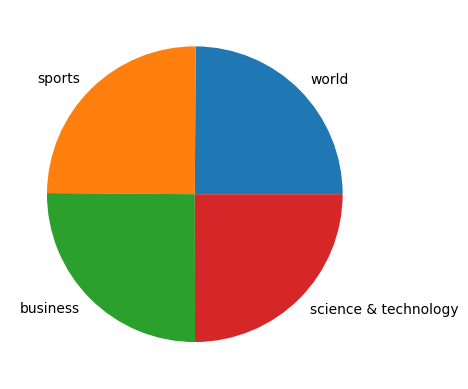

In [68]:
plt.pie(np.array([y_train.value_counts()[1],y_train.value_counts()[2],y_train.value_counts()[3],y_train.value_counts()[4]]), labels=['world', 'sports', 'business', 'science & technology'])
plt.show()

In [69]:
# Model trining and evaluation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred, average='weighted'),3)
    re = round(recall_score(y_act, y_pred, average='weighted'),3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'),3)
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {re}\n\tF1 Score: {f1}')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred, average='weighted'),3)
    re = round(recall_score(y_act, y_pred, average='weighted'),3)
    f1 = round(f1_score(y_act, y_pred, average='weighted'),3)
    print(f'Testing Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {re}\n\tF1 Score: {f1}')

In [72]:
#Logistic Regression model

In [73]:
lr = LogisticRegression(max_iter=1000)
lr.fit(vectorized_x_train, y_train)

LogisticRegression(max_iter=1000)

In [74]:
#checking the prediction is similer to the real one

In [75]:
y_train_pred = lr.predict(vectorized_x_train)

In [76]:
y_train_pred

array([2, 3, 3, ..., 1, 4, 2])

In [77]:
y_train

25385     2
775       1
17394     3
26597     2
16254     3
         ..
54393     3
48669     2
14135     1
11586     4
118666    2
Name: label, Length: 100000, dtype: int64

In [78]:
#checking the accuracy 

In [79]:
training_scores(y_train, y_train_pred)

Training Scores:
	Accuracy: 0.891
	Precision: 0.891
	Recall: 0.891
	F1 Score: 0.89


In [80]:
y_test_pred = lr.predict(vectorized_x_test)

In [81]:
y_test_pred

array([2, 2, 3, ..., 1, 4, 1])

In [82]:
y_test

65444     2
6194      2
115956    3
37993     4
119146    2
         ..
94255     4
42643     1
27118     1
74028     4
13455     1
Name: label, Length: 20000, dtype: int64

In [84]:
testing_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy: 0.855
	Precision: 0.856
	Recall: 0.855
	F1 Score: 0.855


In [85]:
#Nive Bayes model

In [86]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train, y_train)

y_train_pred = mnb.predict(vectorized_x_train)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train, y_train_pred)

testing_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.86
	Precision: 0.86
	Recall: 0.86
	F1 Score: 0.86
Testing Scores:
	Accuracy: 0.849
	Precision: 0.849
	Recall: 0.849
	F1 Score: 0.849


In [87]:
# Decision Tree model

In [88]:

dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train, y_train)

y_train_pred = dt.predict(vectorized_x_train)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train, y_train_pred)

testing_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.991
	Precision: 0.991
	Recall: 0.991
	F1 Score: 0.991
Testing Scores:
	Accuracy: 0.765
	Precision: 0.765
	Recall: 0.765
	F1 Score: 0.765


In [89]:
# Random Forest model

In [90]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train, y_train)

y_train_pred = rf.predict(vectorized_x_train)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train, y_train_pred)

testing_scores(y_test, y_test_pred)

Training Scores:
	Accuracy: 0.991
	Precision: 0.991
	Recall: 0.991
	F1 Score: 0.991
Testing Scores:
	Accuracy: 0.81
	Precision: 0.811
	Recall: 0.81
	F1 Score: 0.81


In [91]:
# saving the prefered model

In [92]:
import pickle

with open('../static/model/model.pickle','wb')as file:
    pickle.dump(lr, file)